In [ ]:
# Load Dependencies
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, SimpleRNN
from keras.datasets import imdb
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt


In [ ]:
# Hyper-Parameters
max_features = 5000
no_classes = 1
max_length = 100
batch_size = 64
embedding_batch_size = 64
dropout_rate = 0.5
hidden_layer_size = 250
no_epochs = 5

In [ ]:
# Load IMDB Data from Keras datasets
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print('Data loaded successfully.')
print('# Train Data = ', len(x_train))
print('# Test Data = ', len(x_test))

17464789/17464789 [==============================] - 0s 0us/step
Data loaded successfully.
# Train Data =  25000
# Test Data =  25000


In [ ]:
# Data Preprocessing
print('Preprocessing Data..')
x_train = sequence.pad_sequences(x_train, maxlen=max_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_length)


Preprocessing Data..


In [ ]:
RNN_model = Sequential()
# Add Embedding layer
RNN_model.add(Embedding(max_features, embedding_batch_size, input_length=max_length))
RNN_model.add(Dropout(dropout_rate))
# Add Simple RNN layer
RNN_model.add(SimpleRNN(units=16 , return_sequences = True ))
RNN_model.add(SimpleRNN(units=8))
# Add Dense Hidden Layer
RNN_model.add(Dense(hidden_layer_size, activation='tanh'))
RNN_model.add(Dropout(dropout_rate))
# Output Layer
RNN_model.add(Dense(no_classes, activation='sigmoid'))

In [ ]:
RNN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train!
print('Training the model..')
history = RNN_model.fit(x_train, y_train, batch_size=batch_size, verbose=2, epochs=no_epochs, validation_data=(x_test, y_test))

Training the model..
Epoch 1/5
391/391 - 29s - loss: 0.5578 - accuracy: 0.6740 - val_loss: 0.4119 - val_accuracy: 0.8236 - 29s/epoch - 75ms/step
Epoch 2/5
391/391 - 27s - loss: 0.3645 - accuracy: 0.8456 - val_loss: 0.3968 - val_accuracy: 0.8370 - 27s/epoch - 68ms/step
Epoch 3/5
391/391 - 36s - loss: 0.2958 - accuracy: 0.8807 - val_loss: 0.3689 - val_accuracy: 0.8422 - 36s/epoch - 91ms/step
Epoch 4/5
391/391 - 26s - loss: 0.2634 - accuracy: 0.8946 - val_loss: 0.4052 - val_accuracy: 0.8395 - 26s/epoch - 66ms/step
Epoch 5/5
391/391 - 26s - loss: 0.2278 - accuracy: 0.9104 - val_loss: 0.4313 - val_accuracy: 0.8265 - 26s/epoch - 66ms/step


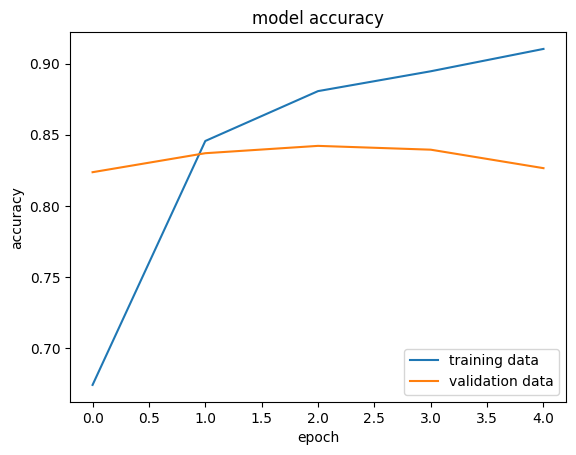

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

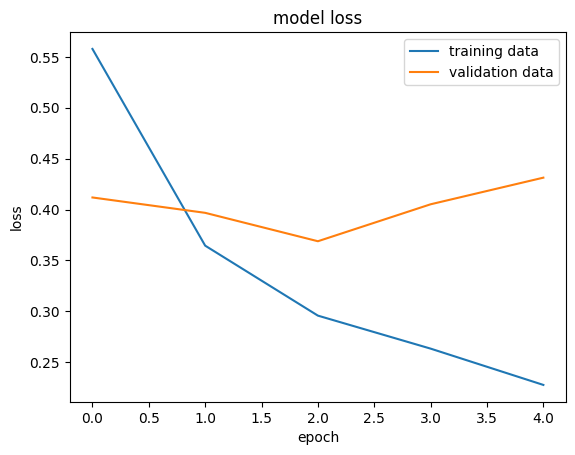

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [ ]:
loss, accuracy = RNN_model.evaluate(x_test, y_test)
print('Accuracy on test data : ', accuracy)

782/782 [==============================] - 10s 13ms/step - loss: 0.4313 - accuracy: 0.8265
Accuracy on test data :  0.826479971408844


In [ ]:
RNN_model.predict(x_test)

782/782 [==============================] - 10s 13ms/step


array([[0.05522289],
       [0.9957595 ],
       [0.78770196],
       ...,
       [0.2687181 ],
       [0.4862181 ],
       [0.97375286]], dtype=float32)